In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor

In [118]:
df=pd.read_csv("C:\\Users\\ashik\\OneDrive\\Desktop\\MLPROJECT\\Used_bikes.csv")
df.head(5)

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [119]:
top_cities = df['city'].value_counts().head(10).index

BAR PLOT

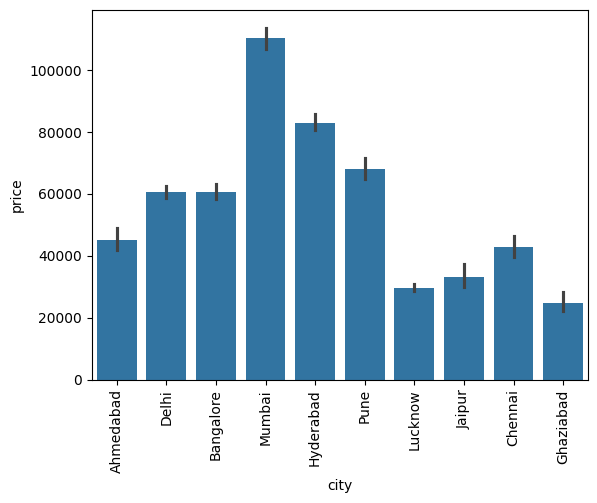

In [120]:
sns.barplot(x='city', y='price', data=df[df['city'].isin(top_cities)])
plt.xticks(rotation=90)
plt.show()

HIST PLOT

In [121]:
top_brands = df['brand'].value_counts().head(10).index

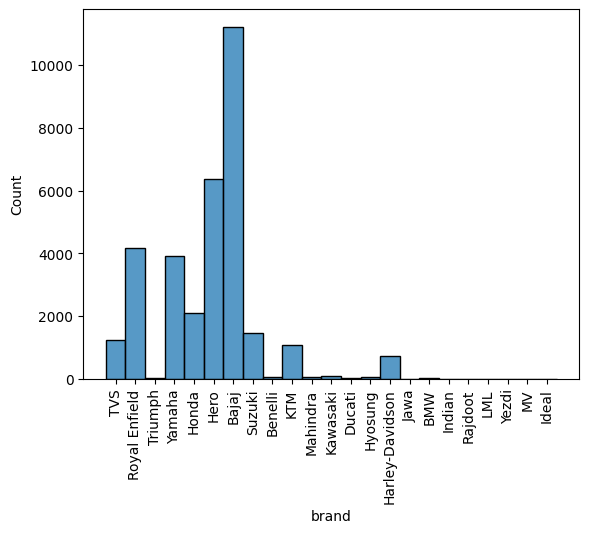

In [122]:
sns.histplot(df.brand)
plt.xticks(rotation=90)
plt.show()

COUNT PLOT

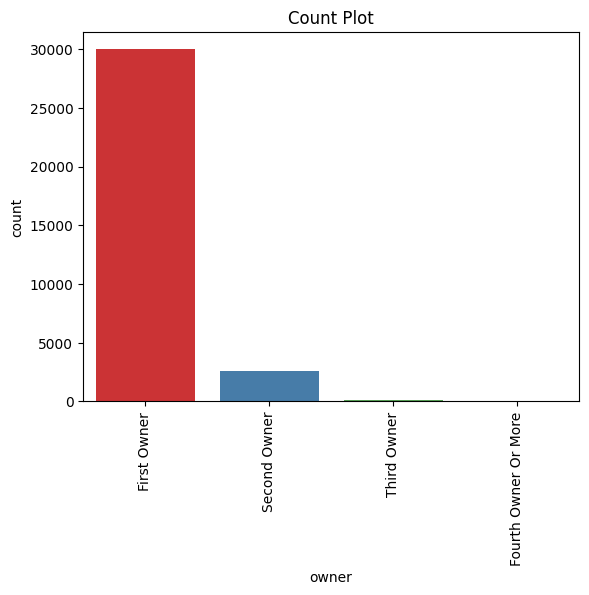

In [123]:
sns.countplot(x=df['owner'],hue=df['owner'],palette='Set1')
plt.title("Count Plot")
plt.xticks(rotation=90)
plt.show()

LINE PLOT

Text(0, 0.5, 'Average Price')

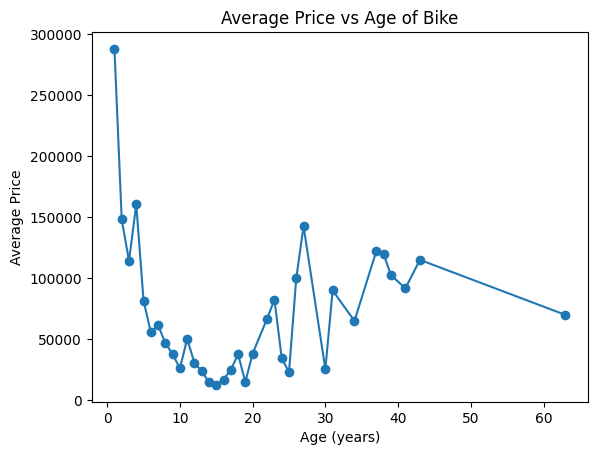

In [124]:
# Group and plot
df.groupby('age')['price'].mean().plot(kind='line', marker='o')
plt.title('Average Price vs Age of Bike')
plt.xlabel('Age (years)')
plt.ylabel('Average Price')


PAIR PLOT

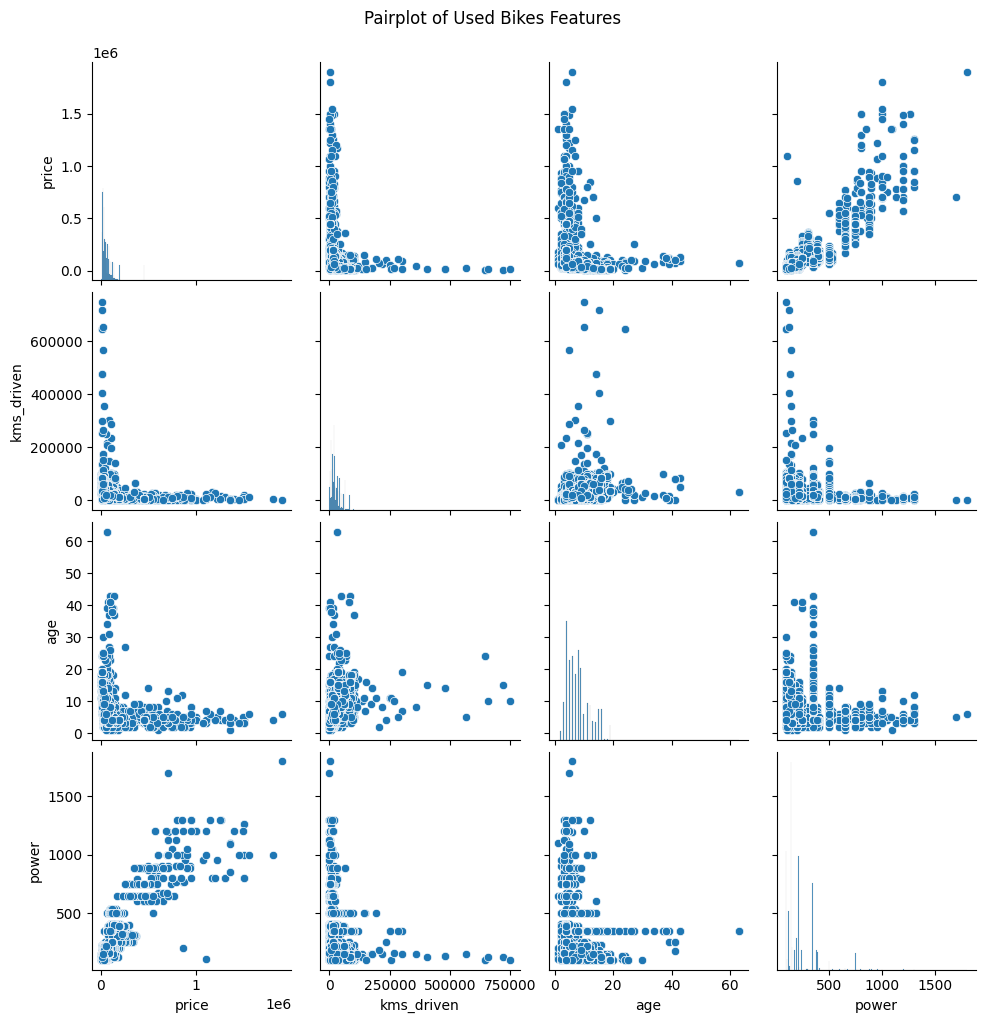

In [125]:
sns.pairplot(df[['price', 'kms_driven', 'age', 'power']])
plt.suptitle('Pairplot of Used Bikes Features', y=1.02)
plt.show()

In [126]:
df.shape

(32648, 8)

In [127]:
df.size

261184

In [128]:
df.dtypes

bike_name      object
price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [129]:
df.describe()

,price,kms_driven,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,8.048211,213.511302
std,9.071860e+04,22208.527695,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,63.000000,1800.000000


In [130]:
df.brand.value_counts()

brand
Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
Yezdi                  1
LML                    1
Name: count, dtype: int64

In [131]:
df.duplicated().sum()

np.int64(25324)

In [132]:
df.drop_duplicates()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
...,...,...,...,...,...,...,...,...
9362,Hero Hunk Rear Disc 150cc,25000.0,Delhi,48587.0,First Owner,8.0,150.0,Hero
9369,Bajaj Avenger 220cc,35000.0,Bangalore,60000.0,First Owner,9.0,220.0,Bajaj
9370,Harley-Davidson Street 750 ABS,450000.0,Jodhpur,3430.0,First Owner,4.0,750.0,Harley-Davidson
9371,Bajaj Dominar 400 ABS,139000.0,Hyderabad,21300.0,First Owner,4.0,400.0,Bajaj


In [133]:
df.isnull().sum()

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [134]:
X = df.drop('price', axis=1)
y = df['price']
x.head()

,kms_driven,age,power,bike_name_BMW G 310 GS,bike_name_BMW G 310 R,bike_name_BMW S 1000 RR Pro,bike_name_BMW S 1000 XR Pro,bike_name_Bajaj Pulsar 180cc,bike_name_Bajaj Avenger 150cc,bike_name_Bajaj Avenger 180cc,...,brand_LML,brand_MV,brand_Mahindra,brand_Rajdoot,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Triumph,brand_Yamaha,brand_Yezdi
0,17654.0,3.0,110.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,11000.0,4.0,350.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,110.0,8.0,675.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,16329.0,4.0,180.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,10000.0,3.0,150.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [135]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
numerical_features = ['kms_driven', 'age', 'power']
categorical_features = ['brand', 'bike_name', 'city', 'owner']

In [137]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(x_train[categorical_features])
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [138]:
x_train_encoded = encoder.transform(x_train[categorical_features])
x_test_encoded = encoder.transform(x_test[categorical_features])

In [139]:
scaler = StandardScaler()
scaler.fit(x_train[numerical_features])
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [140]:
x_train_scaled = scaler.transform(x_train[numerical_features])
x_test_scaled = scaler.transform(x_test[numerical_features])

In [141]:
x_train_processed = np.hstack((x_train_encoded, x_train_scaled))
x_test_processed = np.hstack((x_test_encoded, x_test_scaled))

In [142]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train_processed, y_train)
joblib.dump(model, 'bike_price_model.pkl')

print("✅ Model, Encoder, and Scaler saved successfully!")

✅ Model, Encoder, and Scaler saved successfully!
